In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

https://keras.io/applications/  
https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [3]:
# Load Model from web.  Can skip if already saved

In [4]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from keras.models import model_from_json

model = VGG16(weights='imagenet', include_top=True)

C:\Users\erich\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
model

In [16]:
%%timeit
img_path = 'Image-data\elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#features = model.predict(x)
preds = model.predict(x)

18.9 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
model.predict(x)

array([[4.74351003e-09, 1.89704932e-10, 2.33246378e-09, 1.59960467e-09,
        1.36963010e-08, 1.08704761e-08, 1.14881491e-08, 2.23537366e-09,
        2.20699209e-10, 9.97839749e-08, 8.40757880e-11, 1.42145851e-10,
        2.15363963e-10, 1.72762554e-10, 6.05524686e-10, 1.17934565e-10,
        1.73211945e-10, 7.82109433e-10, 2.05347767e-10, 2.22028784e-10,
        1.59293301e-10, 3.22870886e-09, 3.31856631e-09, 2.58937831e-08,
        2.05364303e-09, 1.01937792e-10, 1.16528120e-10, 5.44102853e-11,
        1.23364027e-10, 6.93407665e-10, 2.74488127e-10, 2.31465985e-10,
        1.32430331e-10, 1.73190315e-08, 1.04530784e-08, 1.41125833e-09,
        7.70701369e-09, 1.73835579e-09, 1.27385186e-10, 1.92436067e-09,
        6.53820997e-10, 6.81595405e-11, 1.32506631e-10, 2.74685186e-09,
        3.06917047e-10, 3.71164499e-09, 1.19480570e-09, 2.00693258e-08,
        6.69828808e-07, 1.88631351e-08, 7.58453300e-09, 3.66391934e-04,
        3.15773047e-10, 9.71579595e-10, 4.27650165e-10, 3.881247

In [15]:
%%timeit
preds = model.predict(x)

17.4 ms ± 73.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


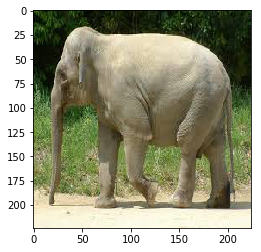

In [14]:
plt.imshow(img)

In [11]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
#print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504013', 'Indian_elephant', 0.6820215), ('n02504458', 'African_elephant', 0.19032808), ('n01871265', 'tusker', 0.12557863)]


# Save and Load Model

In [56]:
# serialize model to JSON
model_json = model.to_json()
with open("Models\VGG19.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Models\VGG19.h5")
print("Saved model to disk")

Saved model to disk


In [101]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
res = []
for i, layer in enumerate(model_VGG19.layers):
    res.append([layer, layer.name, layer.input_shape, layer.output_shape])
M = pd.DataFrame(res)

In [107]:
L = M.iloc[4][0]

In [123]:
L.input_shape

(None, 112, 112, 64)

In [125]:
L.get_weights()[0].shape

(3, 3, 64, 128)

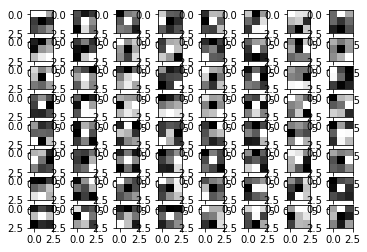

In [135]:
x1w = L.get_weights()[0][:,:,0,:]
for i in range(1,65):
    plt.subplot(8,8,i)
    plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()